# Natural Language Processing - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** September 2022  
**Python version:** Python 3.6+     
**Recommended environment: `researchPython`**

In [1]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primary reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`NLP_Notebook.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/Python_NLP_Tutorial/blob/master/NLP_Notebook.ipynb)  

## Import required packages

In [4]:
import os, re
from pathlib import Path
import pandas as pd
import numpy as np

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy

In [2]:
import spacy
nlp = spacy.load("en_core_web_lg", disable=[
    'Tagger', 'DependencyParser', 
    'EntityRecognizer', 'TextCategorizer']
) ## Note we disable most of this functionality here to speed up our code (as we don't need it for these tasks)

You might have to replace the above with the code below if you installed the language model in an alternative way
```python
import en_core_web_lg
nlp = en_core_web_lg.load()
```

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: center; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 1 </span>
</div>  

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

## 1) Perform basic operations on a sample earnings transcript text file

### 1a) Load the following text file: `data > example_transcript.txt` into Python

### 1b) Print the first 400 characters of the text file you just loaded

### 1c) Count the number of times the name `Angie` is mentioned

### 1c) Use the provided Regular Expression to capture all numbers prior to a "%"  
Use this regular expression: `\W([\.\d]{,})%`  
**You can play around with this regular expression here: <a href='https://bit.ly/3heIqoG'>Test on Pythex.org</a>**

### Extra: try to explain to a neighbor / group member what the regular expression is doing
You can use the cheatsheet on Pythex.org for reference.  

### 1d) Load the text into a Spacy object and split it into a list of  sentences

Make sure to evaluate how well it worked by inspecting various elements of the sentence list.

Note: the beginning of the document contains meta data that are not normal sentences, so you might see some weird "sentences" at the beginning. 

### 1e) Parse out the following three parts of the earnings call transcript and put them in seperate variables:

* The meta data at the top (e.g., company name, period, etc)   
* The presentation portion  
* The Q&A portion

**Note:** you could do it based on the exact location (e.g, `text_file[:1234]`), however, that would only work for this file. Try to come up with a solution that would work for all files that follow the same structure. 

### 1f) How many characters, sentences, words (tokens) do the presentation portion and the Q&A portion have?  

Hint: use `Spacy` for the sentence and word counts.

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: left; margin-left: 0px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Note: problems 1g and 1h are quite challenging, it might make sense to skip them until the end.</span>

### 1g) Create a list of all the questions during the Q&A and include the person that asked the question   

You should end up with 20 questions.

*Hint:* This is best done through a regular expression. 

### 1h) Modify the Q&A list by adding in the answer + answering person

**Note:** this is not an easy question and will probably take you a while. If you are time constraint I would recommend to leave it until the end. :)

This is what the first entry should (rougly) look like:
```python
qa_list[0] = 
{
  'q_person': 'Christopher McGratty ',
  'question': 'Great, thanks, good afternoon. Kevin maybe you could start -- or Alex on the margin, obviously the environment has got a little bit tougher for the banks. But you have this -- the ability to bring down deposit costs, which you talked about in your prepared remarks. I appreciate in the guidance for the first quarter, but if the rate outlook remains steady, how do we think about ultimate stability in the flow and the margin, where and kind of when?',
  'answers': [{
    'name': 'Alex Ko ',
    'answer': 'Sure, sure. As I indicated, we would expect to have continued compression next quarter given the rate cuts that we have experienced especially October rate cut, it will continue next quarter. But as we indicated, our proactive deposit initiative as well as very disciplined pricing on the deposit, even though we have a very competitive -- competition on the loan rate is very still severe. We would expect to stabilize in the second quarter of 2020 in terms of net interest margin and then second half of the year, we would expect to start to increase.'
  }]
}
```

Try to come up with an approach that can handle multiple answers:
```python
{
  "q_person": "Unidentified Participant",
  "question": "Good afternoon everyone. Just a couple of questions. What percentage of your loans for the past quarter were fixed versus variable? And how do you see that trending during the next 12 months? And also, what do you -- are you anticipating from the loan portfolio going forward? Lower or higher from the current level of 5.04%?",
  "answers": [
    {
      "name": "Kevin S. Kim ",
      "answer": "Sure. Now let me start with the mix of the fixed and variable-rate loan. But as you know, we have mortgage loans so let me break into fixed, hybrid and variable. So hybrid what I mean is, it is hybrid, but if it is at a fixed rate, let's say first five years fixed and then variable, it's called hybrid, but if it is within the fixed, we call it as fixed. So total 6% at fixed rate is a 24% at a rate of about 4.6%. And hybrid is a 37% and the variable is 39%. And that 39% or $4.8 billion of variable rate loan consisted of mainly prime-based and also a LIBOR-based. So out of that entire variable rate loan, about 55% of loans are based on the prime and the remaining is based on the LIBOR and some other indexes, but the other index is very minor. So that's the kind of composition of the fixed and the variable and I think you did ask the second question about the loan pricing or the loan volume?"
    },
    {
      "name": "Kevin S. Kim ",
      "answer": "Yield, so going forward, who knows how the interest rate rule [ph] be in the next 12 months or so, but the competition on the lending side is still very competitive. So I don't think in the (inaudible) increase on our loan yield, more realistically, we will see a small compression on our loan yields."
    }
  ]
}
```

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 2:</span>
</div>

## 2) Create sentiment score based on Loughran and McDonald (2011)   

Create a sentiment score for MD&As based on the Loughran and McDonald (2011) word lists.    

#### References  

*Loughran, T., & McDonald, B. (2011). When is a liability not a liability? Textual analysis, dictionaries, and 10‐Ks. The Journal of Finance, 66(1), 35-65.*

#### Data to use

I have included a random selection of 20 pre-processed MDA filings in the `data > MDA_files` folder. The filename is the unique identifier.   

You will also find a file called `MDA_META_DF.xlsx` in the "data" folder, this contains the following meta-data for eaching MD&A: 
* filing date  
* cik   
* company name  
* link to filing

### 2a) Load data into a dictionary with as key the filename and as value the content of the text file

The files should all be in the following folder:  
```
Path.cwd() / 'data' / 'MDA_files'
```

### 2b) Load the Loughran and McDonald master dictionary    
**Note:** The Loughran and McDonald dictionary is included in the "data" folder: `LoughranMcDonald_MasterDictionary_2014.xlsx `

### 2c) Create two lists: one containing all the negative words and the other one containing all the positive words   

Note, you can treat any number that is not 0 as a 1:

```python
0         ## <-- 0
2009      ## <-- 1
2014      ## <-- 1
2011      ## <-- 1
2012      ## <-- 1
```

They include the year instead of a one for versioning purposes. 

**Tip:** I recommend to change all words to lowercase in this step so that you don't need to worry about that later

### 2d) For each MD&A calculate the *total* number of times negative and positive words are mentioned

**Note:** make sure you deal with uppercase vs. lowercase and substring matches.

**Hint 1:** save the counts to a list where each entry is a list that contains the following three items: [*filename*, *total pos count*, *total neg count*], like this:
> [   
    ['21344_0000021344-16-000050.txt', 1234, 1234],   
    ['21510_0000021510-16-000074.txt', 1234, 1234],  
> ....  
 ]   
 
An example to illustrate sub-string matches:

```python
### For example, consider the positive word 'win'

test_sen = "They hockey team made a big win during the winter."

test_sen.count('win')
## gives --> 2 

## We only want to count "win" not "winter", how do we solve that?
```



### 2e) Convert the list created in 3c into a Pandas DataFrame  
**Hint:** Use the `columns=[...]` parameter to name the columns

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 3:</span>
</div>

## 3a) Calculate the Term Frequency (TF) vectors for the MD&A files. 

You should end up with a matrix of the shape 20x6747 (or something along those lines). 20 reflects the number of MDA filings and 6747 reflects the number of unique tokens/words.

**Use the `CountVectorizer` from sci-kit learn:** https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage

## 3b) Find the index of the word "cash"

*Hint:* Search "python how to find index of element in list" on Google

## 3c) Use the index from 3b to retrieve the term frequencies for each MD&A for the word "cash"

It is fine to print the results in a loop, so that you end up with something like this: 


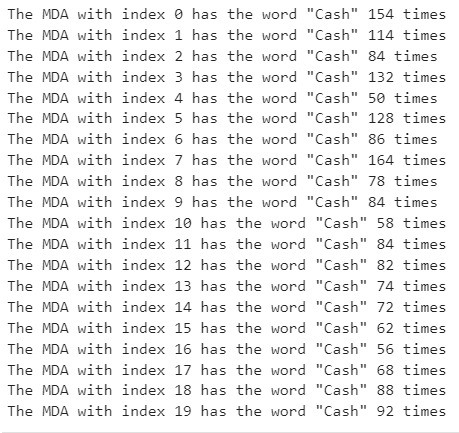

## 3d) Calculate the cosine similarity between two MDA filings using the TF frequency vectors 

**Hint:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html   

**Note:** You only have to compare two filings (of your choice), you *don't* have to calculate the similarity score for every combination!